In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Inspection

In [2]:
dataset = pd.read_csv('Data/Classification_Data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [4]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,0.383838
1,1,1,0,38.0,1,0,71.2833,81,0.383838
2,1,3,0,26.0,0,0,7.9250,146,0.383838
3,1,1,0,35.0,1,0,53.1000,55,0.383838
4,0,3,1,35.0,0,0,8.0500,146,0.383838


In [5]:
dataset.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,0.383838,2.308642,0.647587,29.066409,0.523008,0.381594,32.204208,129.974186,3.838384e-01
std,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,49.693429,35.677211,5.943029e-15
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,3.838384e-01
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,146.000000,3.838384e-01
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,146.000000,3.838384e-01
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,146.000000,3.838384e-01
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.838384e-01


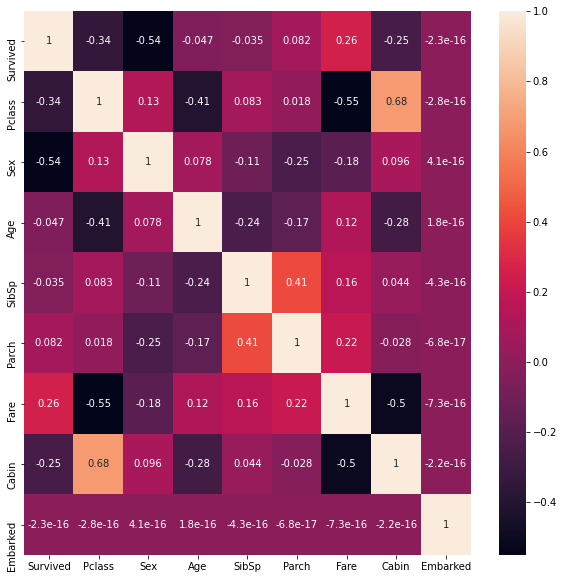

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [8]:
training_data = dataset.drop(['Embarked'], axis = 1)
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,1,22.0,1,0,7.2500,146
1,1,1,0,38.0,1,0,71.2833,81
2,1,3,0,26.0,0,0,7.9250,146
3,1,1,0,35.0,1,0,53.1000,55
4,0,3,1,35.0,0,0,8.0500,146


## Creating Training and Evaluation Data

In [9]:
X = training_data.drop(['Survived'], axis = 1)
y = training_data['Survived']

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_Train, y_Train)

/home/aryan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
predictions = logistic_model.predict(X_Test)

## Model Evaluation

Accuracy:  79.1044776119403


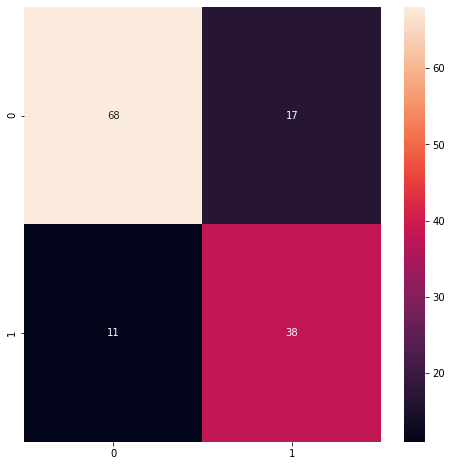

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy: ", accuracy_score(predictions, y_Test)*100)

plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(predictions,y_Test), annot = True)
plt.show()